# Validating modelled tide heights

### Validation against GESLA tide gauges

In [1]:
from eo_tides.model import model_tides
import pandas as pd

tide_df = model_tides(
    x=122.2186,
    y=-18.0008,
    time=pd.date_range(start="2018-01-01", end="2018-01-20", freq="1h"),
    directory="../../tests/data/tide_models",
)

# Print outputs
tide_df.head()

Modelling tides using EOT20


,,,tide_model,tide_height
time,x,y,,
2018-01-01 00:00:00,122.2186,-18.0008,EOT20,1.229286
2018-01-01 01:00:00,122.2186,-18.0008,EOT20,2.162897
2018-01-01 02:00:00,122.2186,-18.0008,EOT20,2.476600
2018-01-01 03:00:00,122.2186,-18.0008,EOT20,2.112390
2018-01-01 04:00:00,122.2186,-18.0008,EOT20,1.181283


/workspaces/eo-tides/.venv/lib/python3.12/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(
/workspaces/eo-tides/eo_tides/validation.py:157: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  pd.read_csv(


Correlation         0.997
RMSE                0.168
MAE                 0.135
R-squared           0.994
Bias                0.014
Regression slope    0.976
dtype: float64

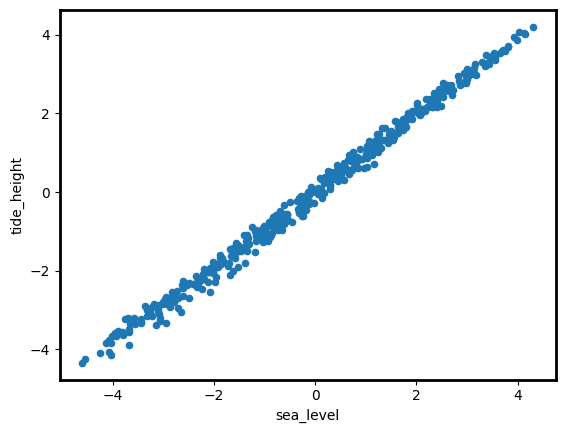

In [2]:
from eo_tides.validation import eval_metrics, load_gauge_gesla

# Load gauge data, subtracting to observed mean sea level
gauge_df = load_gauge_gesla(
    x=122.3186,
    y=-18.0008,
    time=("2018-01-01", "2018-01-20"),
    correct_mean=True,
    data_path="../../tests/data/",
    metadata_path="../../tests/data/GESLA3_ALL 2.csv",
)
gauge_df.head()

# Combine modelled and observed gauge data and compare
joined_df = gauge_df.join(tide_df)
joined_df.plot.scatter(x="sea_level", y="tide_height")
eval_metrics(x=joined_df.sea_level, y=joined_df.tide_height)